# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

array([[<AxesSubplot:title={'center':'total_images'}>,
        <AxesSubplot:title={'center':'last_price'}>,
        <AxesSubplot:title={'center':'total_area'}>,
        <AxesSubplot:title={'center':'rooms'}>],
       [<AxesSubplot:title={'center':'ceiling_height'}>,
        <AxesSubplot:title={'center':'floors_total'}>,
        <AxesSubplot:title={'center':'living_area'}>,
        <AxesSubplot:title={'center':'floor'}>],
       [<AxesSubplot:title={'center':'kitchen_area'}>,
        <AxesSubplot:title={'center':'balcony'}>,
        <AxesSubplot:title={'center':'airports_nearest'}>,
        <AxesSubplot:title={'center':'cityCenters_nearest'}>],
       [<AxesSubplot:title={'center':'parks_around3000'}>,
        <AxesSubplot:title={'center':'parks_nearest'}>,
        <AxesSubplot:title={'center':'ponds_around3000'}>,
        <AxesSubplot:title={'center':'ponds_nearest'}>],
       [<AxesSubplot:title={'center':'days_exposition'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], d

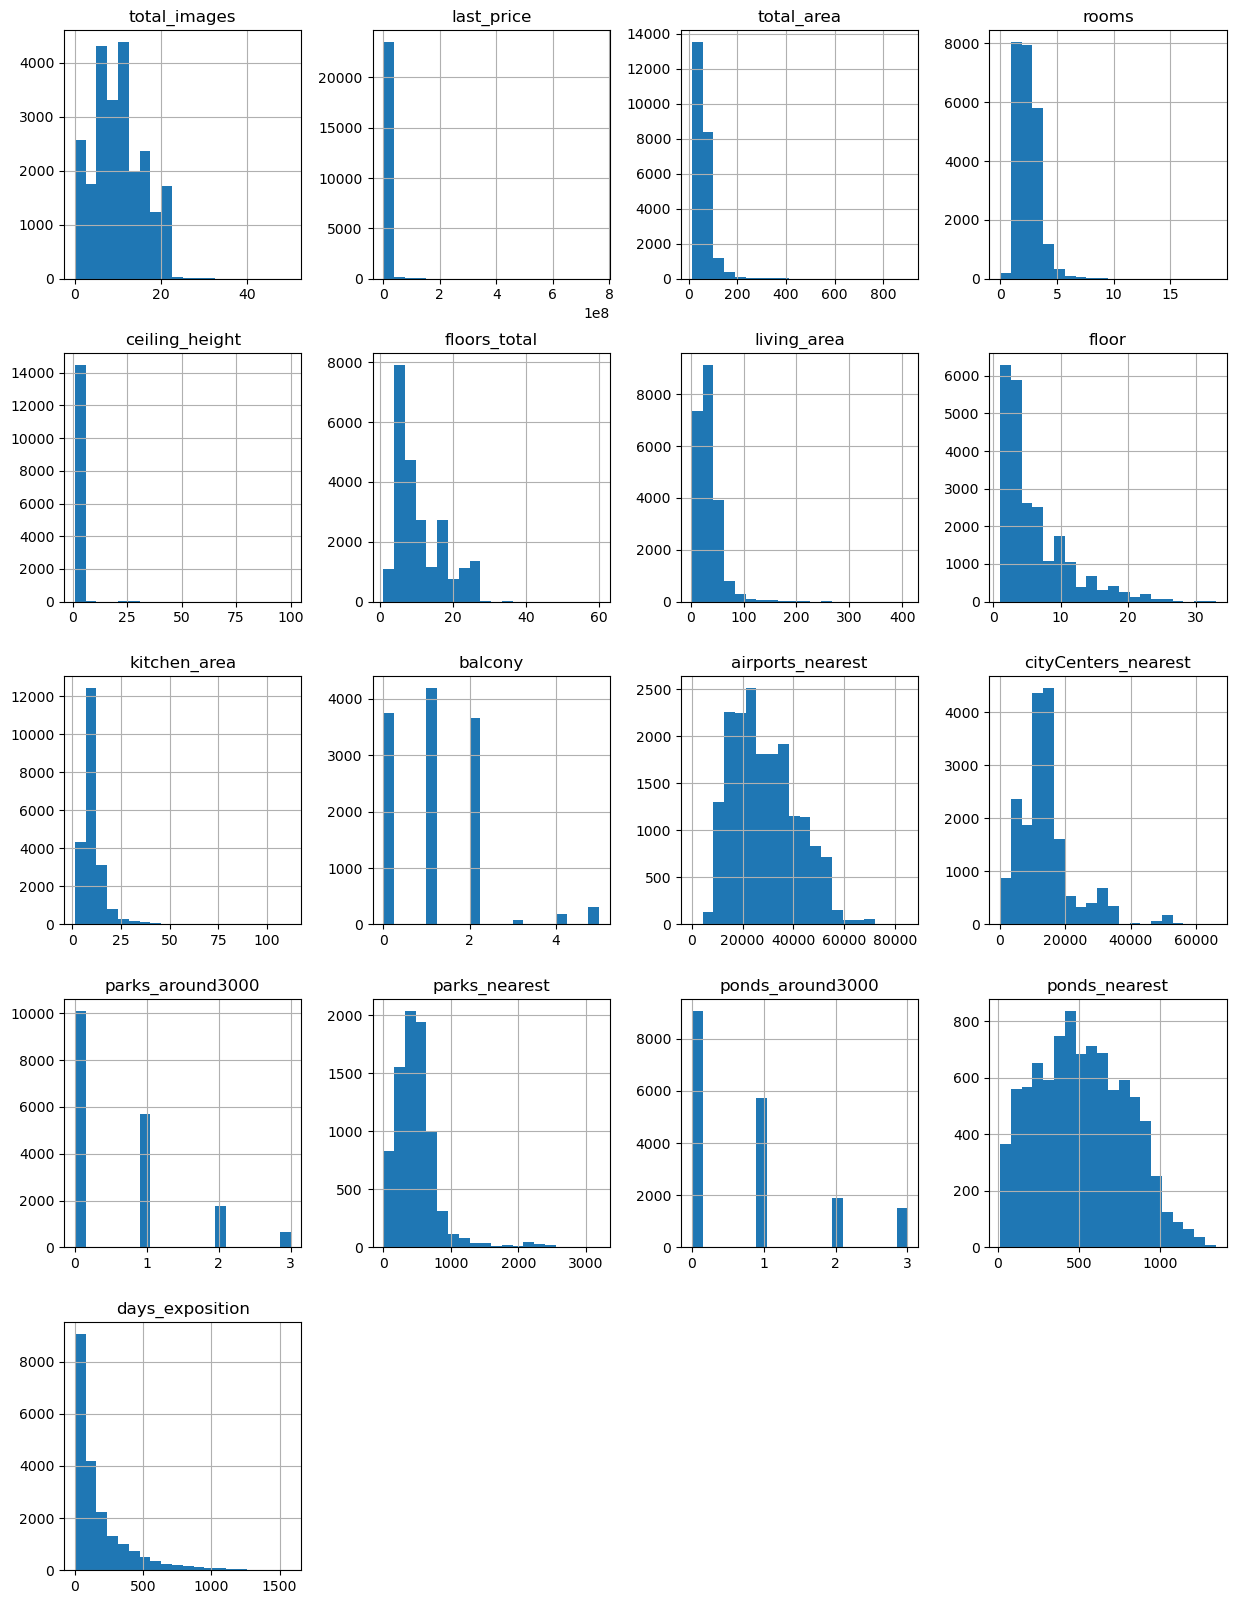

In [1]:
import pandas as pd
import seaborn
import matplotlib.pyplot as plt

try:
    data = pd.read_csv('real_estate_data.csv', sep='\t')
except:
    data = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
    
data.info()
data.hist(figsize=(15, 20), bins=20)

In [2]:
data.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,25.0,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,11.0,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,8.3,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,41.0,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0


Пропуски определяем по количеству non-null значений: всего строк 23699, соответственно, если посчитанных значений в каком-то столбце меньше - там есть пропуски. Часть их связана с тем, что необходимых объектов просто нет (например, балконов в квартире или парков поблизости), и их можно будет заменить на 0. Другие же связаны с техническими причинами при составлении данных.

### Предобработка данных

In [3]:
# просматриваем уникальные значения по каждому столбцу, где есть пропуски
print('Высота потолка', data['ceiling_height'].unique())
print('Всего этажей', data['floors_total'].unique())
print('Жилая площадь', data['living_area'].unique())
print('Апартаменты', data['is_apartment'].unique())
print('Площадь кухни', data['kitchen_area'].unique())
print('Балконов', data['balcony'].unique())
print('Населённый пункт', data['locality_name'].sort_values().unique())
print('Расстояние до аэропорта', data['airports_nearest'].unique())
print('Расстояние до центра', data['cityCenters_nearest'].unique())
print('Парки до 3 км', data['parks_around3000'].unique())
print('Расстояние до ближайшего парка', data['parks_nearest'].unique())
print('Пруды до 3 км', data['ponds_around3000'].unique())
print('Расстояние до ближайшего пруда', data['ponds_nearest'].unique())
print('Сколько времени продавалась квартира', data['days_exposition'].unique())

Высота потолка [  2.7     nan   3.03   2.5    2.67   2.56   3.05   2.75   2.6    2.9
   2.8    2.55   3.     2.65   3.2    2.61   3.25   3.45   2.77   2.85
   2.64   2.57   4.15   3.5    3.3    2.71   4.     2.47   2.73   2.84
   3.1    2.34   3.4    3.06   2.72   2.54   2.51   2.78   2.76  25.
   2.58   3.7    2.52   5.2    2.87   2.66   2.59   2.     2.45   3.6
   2.92   3.11   3.13   3.8    3.15   3.55   3.16   3.62   3.12   2.53
   2.74   2.96   2.46   5.3    5.     2.79   2.95   4.06   2.94   3.82
   3.54   3.53   2.83   4.7    2.4    3.38   3.01   5.6    3.65   3.9
   3.18   3.35   2.3    3.57   2.48   2.62   2.82   3.98   2.63   3.83
   3.52   3.95   3.75   2.88   3.67   3.87   3.66   3.85   3.86   4.19
   3.24   4.8    4.5    4.2    3.36  32.     3.08   3.68   3.07   3.37
   3.09   8.     3.26   3.34   2.81   3.44   2.97   3.14   4.37   2.68
   3.22   3.27  27.     4.1    2.93   3.46  24.     3.47   3.33   3.63
   3.32  26.     1.2    8.3    2.98   2.86   3.17   4.4    3.28   3

In [4]:
# заполняем нулями пропуски, которые можно классифицировать как нули
to_int = ['balcony', 'parks_around3000', 'ponds_around3000', 'floors_total']

for i in to_int:
    data[i] = data[i].fillna(0)
data['is_apartment'] = data['is_apartment'].fillna(False) # здесь True/False вместо чисел,
# логично предположить, что если не указано, что жильё - апартаменты, оно ими не является

In [5]:
# приводим к единому виду обозначения населённых пунктов

to_replace = (
    ('поселок', 'посёлок'),
    ('садоводческое некоммерческое', 'садовое'),
    ('городской ', ''),
    ('городского типа ', ''),
    ('станции ', ''),
    ('при железнодорожной ', ''),
    ('коттеджный ', ''),
)

for old, new in to_replace:
    data['locality_name'] = data['locality_name'].str.replace(old, new)

print(data['locality_name'].unique()) # вспомогательный вывод для проверки

['Санкт-Петербург' 'посёлок Шушары' 'посёлок Янино-1' 'посёлок Парголово'
 'посёлок Мурино' 'Ломоносов' 'Сертолово' 'Петергоф' 'Пушкин'
 'деревня Кудрово' 'Коммунар' 'Колпино' 'посёлок Красный Бор' 'Гатчина'
 'деревня Фёдоровское' 'Выборг' 'Кронштадт' 'Кировск'
 'деревня Новое Девяткино' 'посёлок Металлострой' 'посёлок Лебяжье'
 'посёлок Сиверский' 'посёлок Молодцово' 'посёлок Кузьмоловский'
 'садовое товарищество Новая Ропша' 'Павловск' 'деревня Пикколово'
 'Всеволожск' 'Волхов' 'Кингисепп' 'Приозерск' 'Сестрорецк'
 'деревня Куттузи' 'посёлок Аннино' 'посёлок Ефимовский'
 'посёлок Плодовое' 'деревня Заклинье' 'посёлок Торковичи'
 'посёлок Первомайское' 'Красное Село' 'посёлок Понтонный' 'Сясьстрой'
 'деревня Старая' 'деревня Лесколово' 'посёлок Новый Свет' 'Сланцы'
 'село Путилово' 'Ивангород' 'Мурино' 'Шлиссельбург' 'Никольское'
 'Зеленогорск' 'Сосновый Бор' 'деревня Оржицы' 'деревня Кальтино'
 'Кудрово' 'посёлок Романовка' 'посёлок Бугры' 'посёлок Рощино' 'Кириши'
 'Луга' 'Волосово'

In [6]:
# меняем типы данных
to_int = ['balcony', 'parks_around3000', 'ponds_around3000', 'floors_total']

for i in to_int:
    data[i] = data[i].astype('int')

Заменены float на int в данных, значения которых могут быть только целыми: число балконов, парков и водоёмов. Также заменено на int общее число этажей - во-первых, оно тоже может быть только целым, во-вторых, для единообразия со столбцом floor (этаж, на котором расположена квартира). Перед этим пришлось заполнить пропуски в этом столбце нулями, т.к. NaN невозможно привести к типу int.

In [7]:
# исправляем аномалии потолков
# data['ceiling_height'].hist(bins=50, figsize=(8,8), range=(0,10)) # сначала оцениваем выборку потолков нормальной высоты
# data['ceiling_height'].hist(bins=50, figsize=(8,8), range=(10,100)) # потом выводим аномально высокие

high_ceilings = data.query('ceiling_height > 20') # выносим в отдельную переменную аномально высокие потолки

data['ceiling_height_fixed'] = (
    data['ceiling_height']
    .where(~data['ceiling_height'].isin(high_ceilings.index), data['ceiling_height'].div(10))
) # если значение высоты НЕ попало в слишком высокие, оставляем неизменным, в противном случае делим на 10
# data.head() # вспомогательный вывод для определения, правильно ли отработало

По высоте потолков выделяется большое количество обычной высоты - 2-3 метра, и аномалий - 20-30 метров. Можно предположить, что авторы объявлений просто забыли запятую, и на самом деле это те же 2-3 метра, а следовательно, можно просто разделить значение высоты на 10. При этом есть потолки с высотой около 10 метров и один - 100 метров; скорее всего, 100 - тоже следствие забытой запятой, но природа 10-метровых пока неизвестна.

In [8]:
# заполняем пропуски в высоте потолков медианой
data['ceiling_height_fixed'] = data['ceiling_height_fixed'].fillna(data['ceiling_height_fixed'].median())

<AxesSubplot:title={'center':'Общая площадь'}, ylabel='Frequency'>

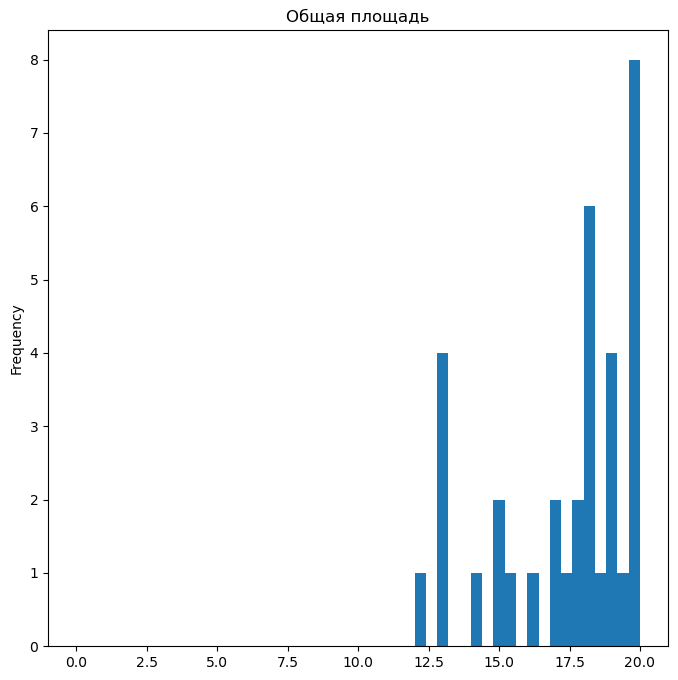

In [9]:
# ищем аномалии в значениях площади
# data['total_area'].hist(bins=50, figsize=(8,8)) # сначала смотрим гистограмму площадей и замечаем малые значения
data['total_area'].plot(kind='hist', bins=50, figsize=(8,8), range=(0, 20), title='Общая площадь')
# смотрим распределение по этим значениям

Пока что явных аномалий не видно.

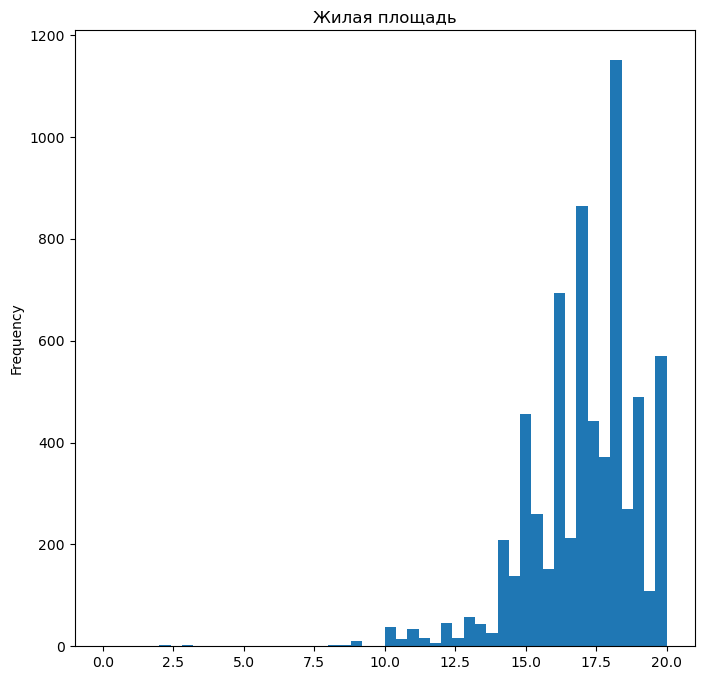

In [10]:
# смотрим распределение жилой площади
# data['living_area'].hist(bins=50, figsize=(8,8)) # сначала смотрим гистограмму площадей и замечаем малые значения
data['living_area'].plot(kind='hist', bins=50, figsize=(8,8), range=(0, 20), title='Жилая площадь');
# смотрим распределение по этим значениям

А здесь заметны странные очень маленькие значения в окрестности 2.5 квадратных метров. Чтобы понять их природу, нужно сравнить эти площади с площадью кухни - возможно, такая же опечатка, как и в случае с потолками, только на этот раз запятая лишняя.

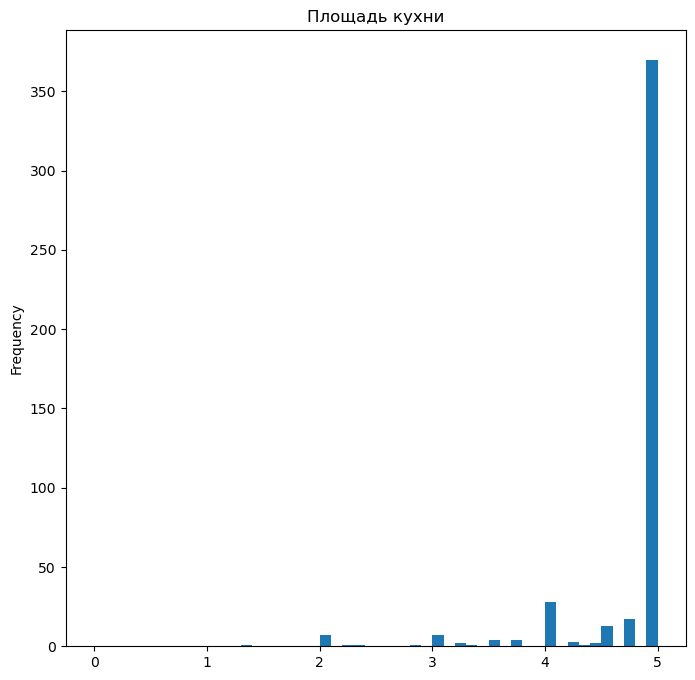

In [11]:
# смотрим распределение площади кухни
# data['kitchen_area'].hist(bins=50, figsize=(8,8)) # сначала смотрим гистограмму площадей
data['kitchen_area'].plot(kind='hist', bins=50, figsize=(8,8), range=(0, 5), title='Площадь кухни');
# смотрим распределение по малым значениям

Здесь тоже встречаются очень малые значения. Нужно выяснить, связаны ли они между собой.

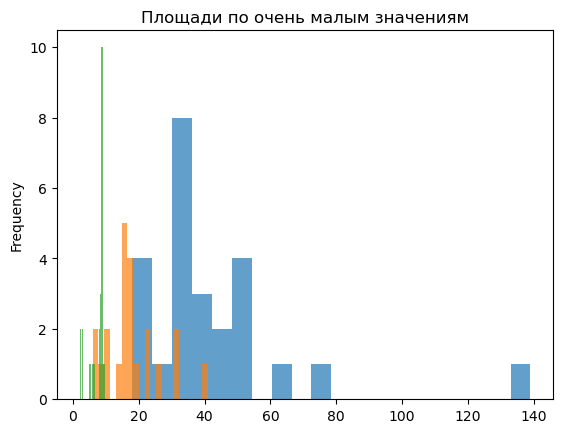

In [12]:
# рассматриваем квартиры с малой жилплощадью

small_area = data.query('living_area < 10')
plt.title('Площади по очень малым значениям')
small_area['total_area'].plot(kind='hist', bins=20, alpha=0.7)
small_area['kitchen_area'].plot(kind='hist', bins=20, alpha=0.7)
small_area['living_area'].plot(kind='hist', bins=20, alpha=0.7)
plt.show()

Прямой связи малой жилплощади с общей площадью и/или площадью кухни не наблюдается, а детальное изучение квартир с очень малой жилой площадью (2 и 3 квадратных метра) показывает, что общая площадь в них имеет нормальное значение, при этом природа аномалии неясна - непохоже, чтобы это объяснялось неверно поставленной запятой или иными тривиальными причинами. Кажется, лучшим решением будет отбросить такие квартиры как статистический выброс.

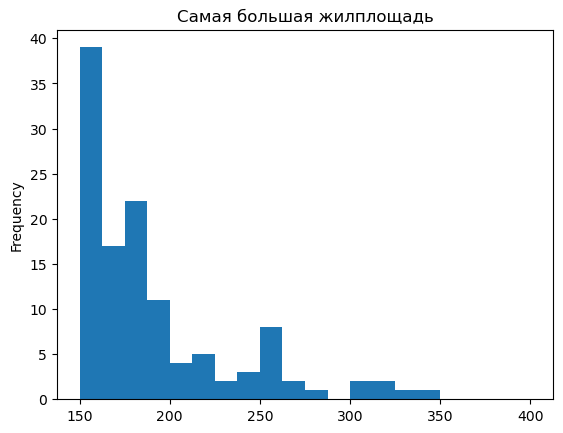

In [13]:
# отбрасываем квартиры с очень малой жилой площадью
data = data.query('living_area > 3')
data['living_area'].plot(kind='hist', bins=20, range=(150, 400), title='Самая большая жилплощадь');
# теперь смотрим очень большую жилплощадь
# print(data.query('living_area > 300')) # также на всякий случай выводим информацию о квартирах с самой большой жилплощадью,
# но с ними всё выглядит нормально - общая площадь тоже огромная и цена соответствует, т.е. аномальных значений нет

### Посчитайте и добавьте в таблицу новые столбцы

In [14]:
def categorize_floor(floor, floor_max): # категоризируем этажи
    if floor == 1:
        return 'первый'
    elif floor == floor_max:
        return 'последний'
    else:
        return 'другой'

In [15]:
data['square_meter_price'] = data['last_price'] / data['total_area'] # цена квадратного метра
data['first_day_exposition'] = pd.to_datetime(data['first_day_exposition'], format='%Y-%m-%dT%H:%M:%S')
# переводим строку в дату
data['weekday'] = data['first_day_exposition'].dt.weekday # день недели
data['month'] = data['first_day_exposition'].dt.month # месяц
data['year'] = data['first_day_exposition'].dt.year # год
data['floor_type'] = data.apply(lambda x: categorize_floor(x.floor, x.floors_total), axis=1) # тип этажа
data['center_distance'] = data['cityCenters_nearest'].div(1000).round() # расстояние до центра в км
data.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,ceiling_height_fixed,square_meter_price,weekday,month,year,floor_type,center_distance
0,20,13000000.0,108.00,2019-03-07,3,2.70,16,51.00,8,False,...,2,755.0,NaN,2.70,120370.370370,3,3,2019,другой,16.0
1,7,3350000.0,40.40,2018-12-04,1,NaN,11,18.60,1,False,...,0,NaN,81.0,2.65,82920.792079,1,12,2018,первый,19.0
2,10,5196000.0,56.00,2015-08-20,2,NaN,5,34.30,4,False,...,2,574.0,558.0,2.65,92785.714286,3,8,2015,другой,14.0
4,2,10000000.0,100.00,2018-06-19,2,3.03,14,32.00,13,False,...,1,48.0,121.0,3.03,100000.000000,1,6,2018,другой,8.0
5,10,2890000.0,30.40,2018-09-10,1,NaN,12,14.40,5,False,...,0,NaN,55.0,2.65,95065.789474,0,9,2018,другой,NaN
6,6,3700000.0,37.30,2017-11-02,1,NaN,26,10.60,6,False,...,0,NaN,155.0,2.65,99195.710456,3,11,2017,другой,19.0
8,20,2900000.0,33.16,2018-05-23,1,NaN,27,15.43,26,False,...,0,NaN,189.0,2.65,87454.764777,2,5,2018,другой,NaN
9,18,5400000.0,61.00,2017-02-26,3,2.50,9,43.60,7,False,...,0,NaN,289.0,2.50,88524.590164,6,2,2017,другой,15.0
10,5,5050000.0,39.60,2017-11-16,1,2.67,12,20.30,3,False,...,2,553.0,137.0,2.67,127525.252525,3,11,2017,другой,14.0
11,9,3300000.0,44.00,2018-08-27,2,NaN,5,31.00,4,False,...,0,NaN,7.0,2.65,75000.000000,0,8,2018,другой,52.0


### Проведите исследовательский анализ данных

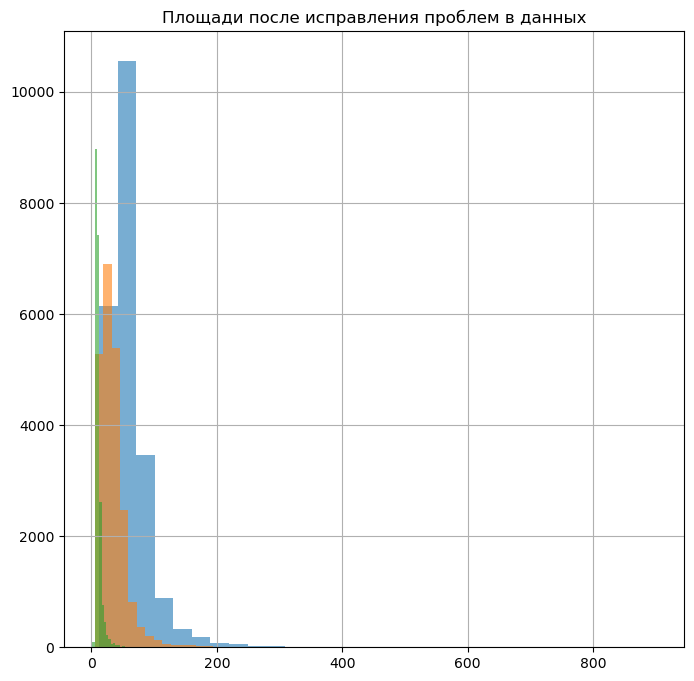

In [16]:
# изучаем гистограммы площадей - общей, жилой и кухни
plt.title('Площади после исправления проблем в данных')
data['total_area'].hist(bins=30, alpha=0.6, figsize=(8,8))
data['living_area'].hist(bins=30, alpha=0.6, figsize=(8,8))
data['kitchen_area'].hist(bins=30, alpha=0.6, figsize=(8,8))
plt.show()

Распределение площадей больше не выглядит аномальным - не наблюдается выбросов ни слишком больших, ни нереалистично-малых объектов.

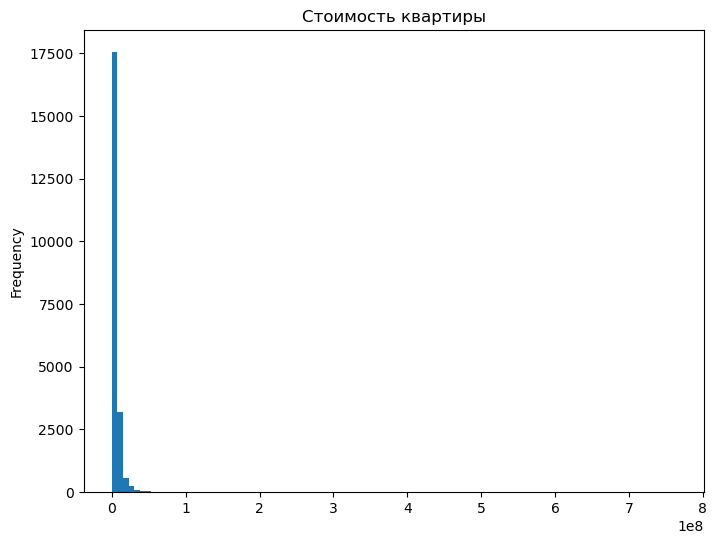

In [17]:
# гистограмма стоимости
data['last_price'].plot(kind='hist', bins=100, figsize=(8,6), title='Стоимость квартиры');

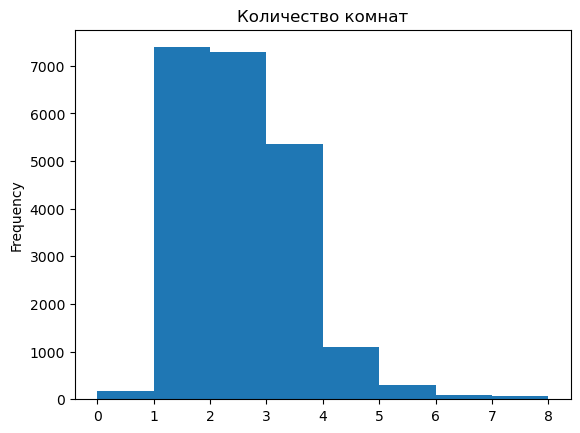

In [18]:
# количество комнат
data['rooms'].plot(kind='hist', bins=8, range=(0,8), title='Количество комнат');

Интересно наличие квартир с 0 комнат. Имеет смысл посмотреть детальные сведения о них - не аномалия ли это. Возможно, речь о квартирах-студиях?

In [19]:
# считаем строки с 0 комнат по столбцу studio
print(data.query('rooms == 0').studio.value_counts())

True     127
False     55
Name: studio, dtype: int64


Не все квартиры с 0 комнат - студии, хотя большинство из них таковыми являются.

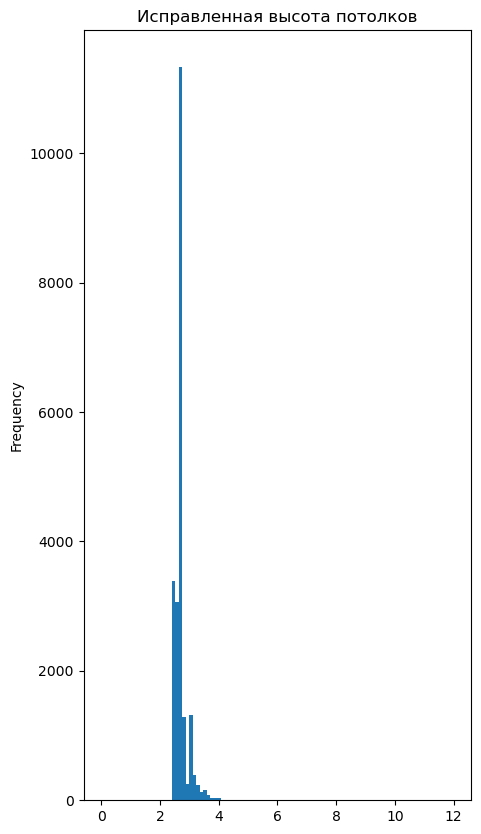

In [20]:
# высота потолков (считаем по столбцу с исправленной высотой)
data['ceiling_height_fixed'].plot(kind='hist', bins=100, range=(0, 12), 
                                  figsize=(5,10), title='Исправленная высота потолков');

Теперь подавляющее большинство потолков укладываются в высоту от 2 до 4 метров, что вполне соответствует действительности.

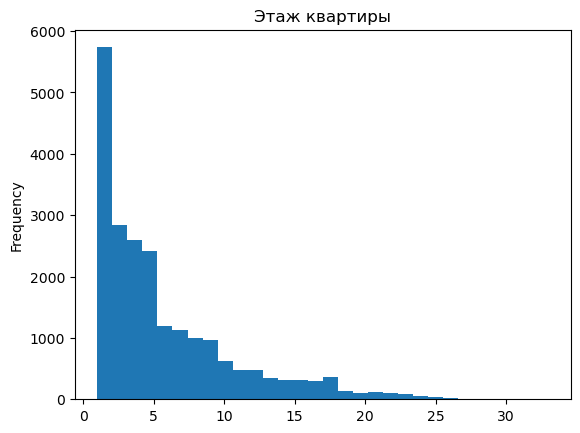

In [21]:
# этаж квартиры
data['floor'].plot(kind='hist', bins=30, title='Этаж квартиры');

Большинство продаваемых квартир располагаются на 1-5 этажах, а выше 20 этажа - совсем мало.

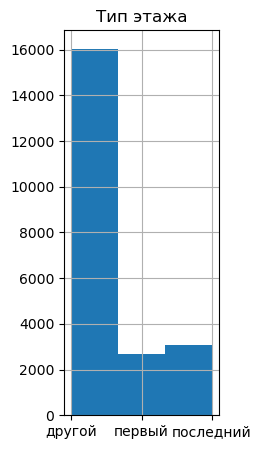

In [22]:
# тип этажа
plt.title('Тип этажа')
data['floor_type'].hist(bins=3, figsize=(2,5))
plt.show()

По гистограмме с номером этажа может создаться впечатление, что квартир на 1 этаже очень много, но эта гистограмма показывает, что на самом деле их меньше, чем на последнем (а больше всего - где-то между ними, что выглядит логично).

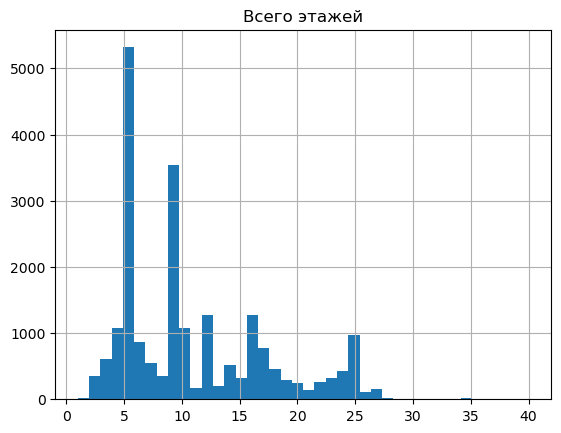

In [23]:
# всего этажей в доме
plt.title('Всего этажей')
data['floors_total'].hist(bins=40, range=(1,40)) # считаем с единицы, потому что 0 - это заполненные пропуски
plt.show()

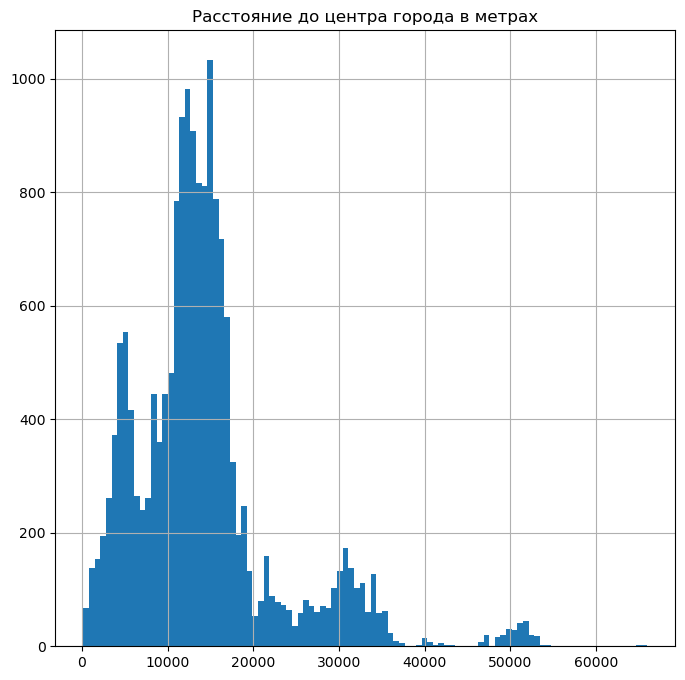

In [24]:
plt.title('Расстояние до центра города в метрах')
data['cityCenters_nearest'].hist(bins=100, figsize=(8,8))
plt.show()

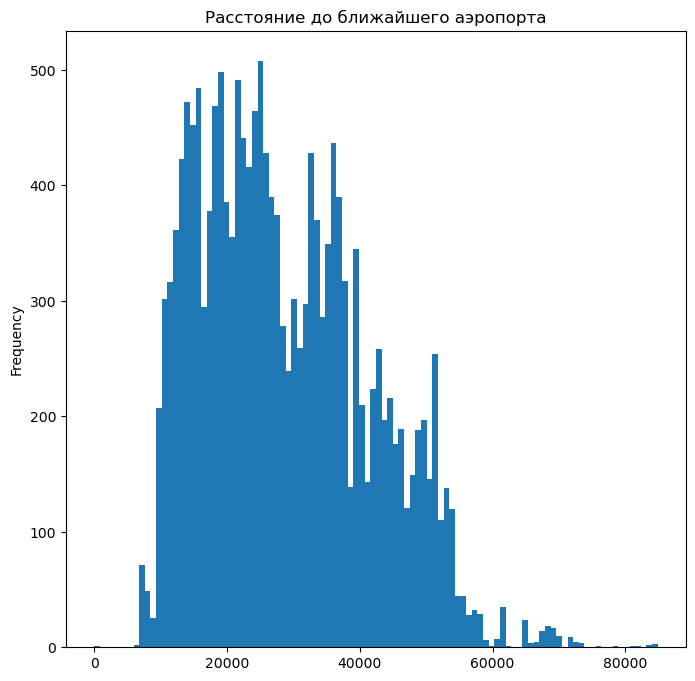

In [25]:
# функция для облегчения однотипной работы по построению графиков
def plotting(kind, data, bins, size, title):
    return data.plot(kind=kind, bins=bins, figsize=size, title=title);

plotting('hist', data['airports_nearest'], 100, (8,8), 'Расстояние до ближайшего аэропорта');

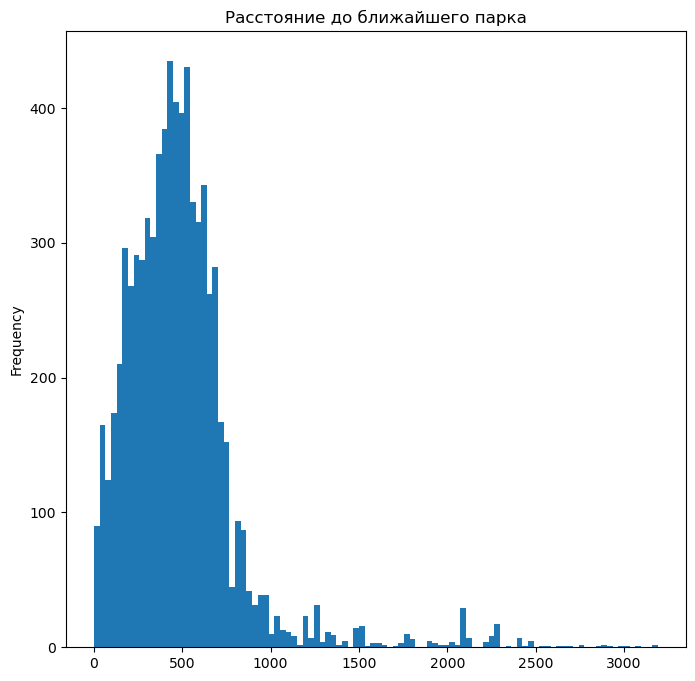

In [26]:
plotting('hist', data['parks_nearest'], 100, (8,8), 'Расстояние до ближайшего парка');

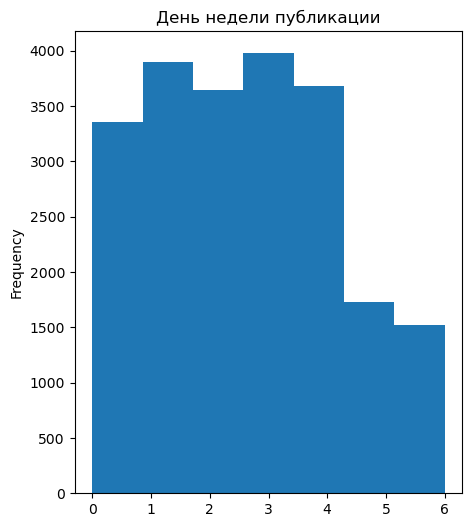

In [27]:
# день публикации объявления
plotting('hist', data['weekday'], 7, (5,6), 'День недели публикации');

Больше всего объявлений опубликованы в четверг и вторник, меньше всего - в воскресенье (число объявлений в выходные в принципе меньше, чем в будни).

<AxesSubplot:title={'center':'Месяц публикации'}, ylabel='Frequency'>

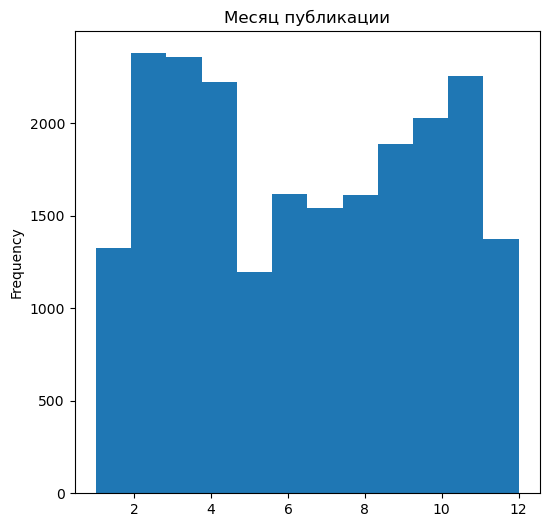

In [28]:
# месяц публикации объявления
plotting('hist', data['month'], 12, (6,6), 'Месяц публикации')

Выделяются два активных периода - с февраля по апрель (при этом в мае число объявлений минимально) и с сентября по ноябрь.

Среднее 184.90286564942315
Медиана 101.0


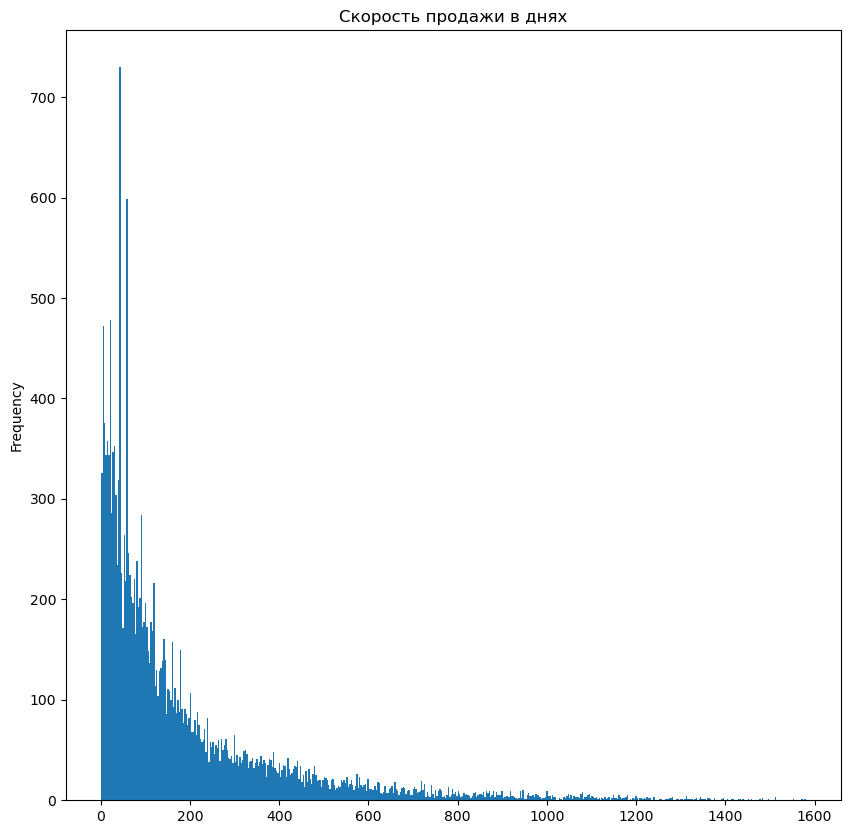

In [29]:
# изучаем скорость продажи
plotting('hist', data['days_exposition'], 500, (10,10), 'Скорость продажи в днях')
print('Среднее', data['days_exposition'].mean())
print('Медиана', data['days_exposition'].median())

Подавляющее большинство продаж занимают меньше 600 дней, при этом весьма много быстрых продаж - объявление висит меньше медианного количества дней. Необычно долгими можно считать продажи дольше 1000 дней.

Корреляция цены и общей площади: 0.6414763519094702


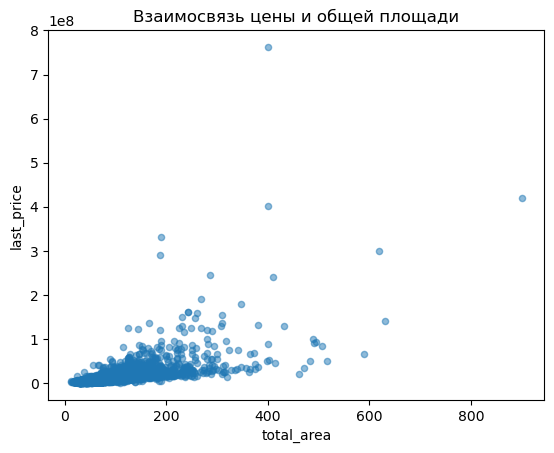

In [30]:
# ищем зависимость цены от параметров квартиры

data.plot(x='total_area', y='last_price', kind='scatter', alpha=0.5, title='Взаимосвязь цены и общей площади')
print('Корреляция цены и общей площади:', data['last_price'].corr(data['total_area']))

Цена зависит от общей площади, но наблюдаются выбросы, где цена растёт намного быстрее, чем площадь.

Корреляция цены и жилой площади: 0.5672939750360914


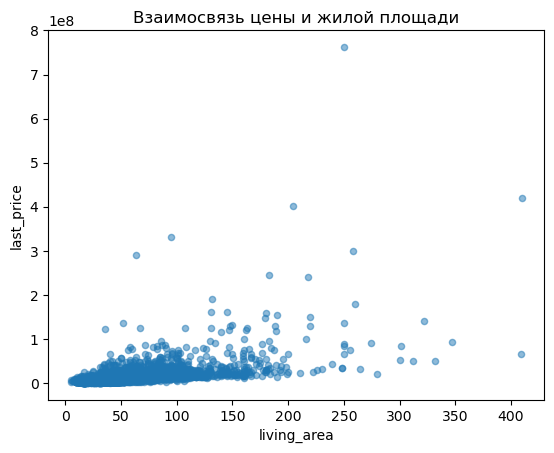

In [31]:
data.plot(x='living_area', y='last_price', kind='scatter', alpha=0.5, title='Взаимосвязь цены и жилой площади')
print('Корреляция цены и жилой площади:', data['last_price'].corr(data['living_area']))

Здесь связь меньше.

Корреляция цены и площади кухни: 0.5177392964501415


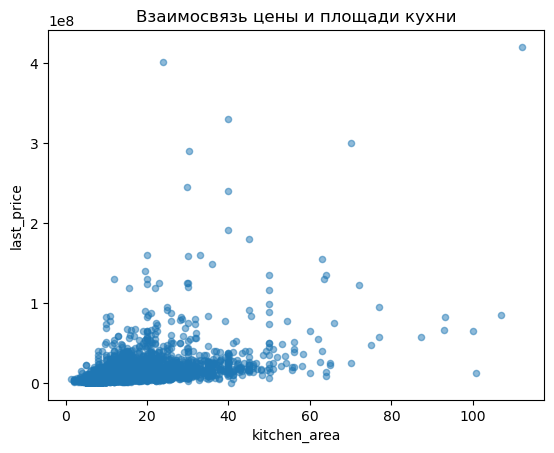

In [32]:
data.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.5, title='Взаимосвязь цены и площади кухни')
print('Корреляция цены и площади кухни:', data['last_price'].corr(data['kitchen_area']))

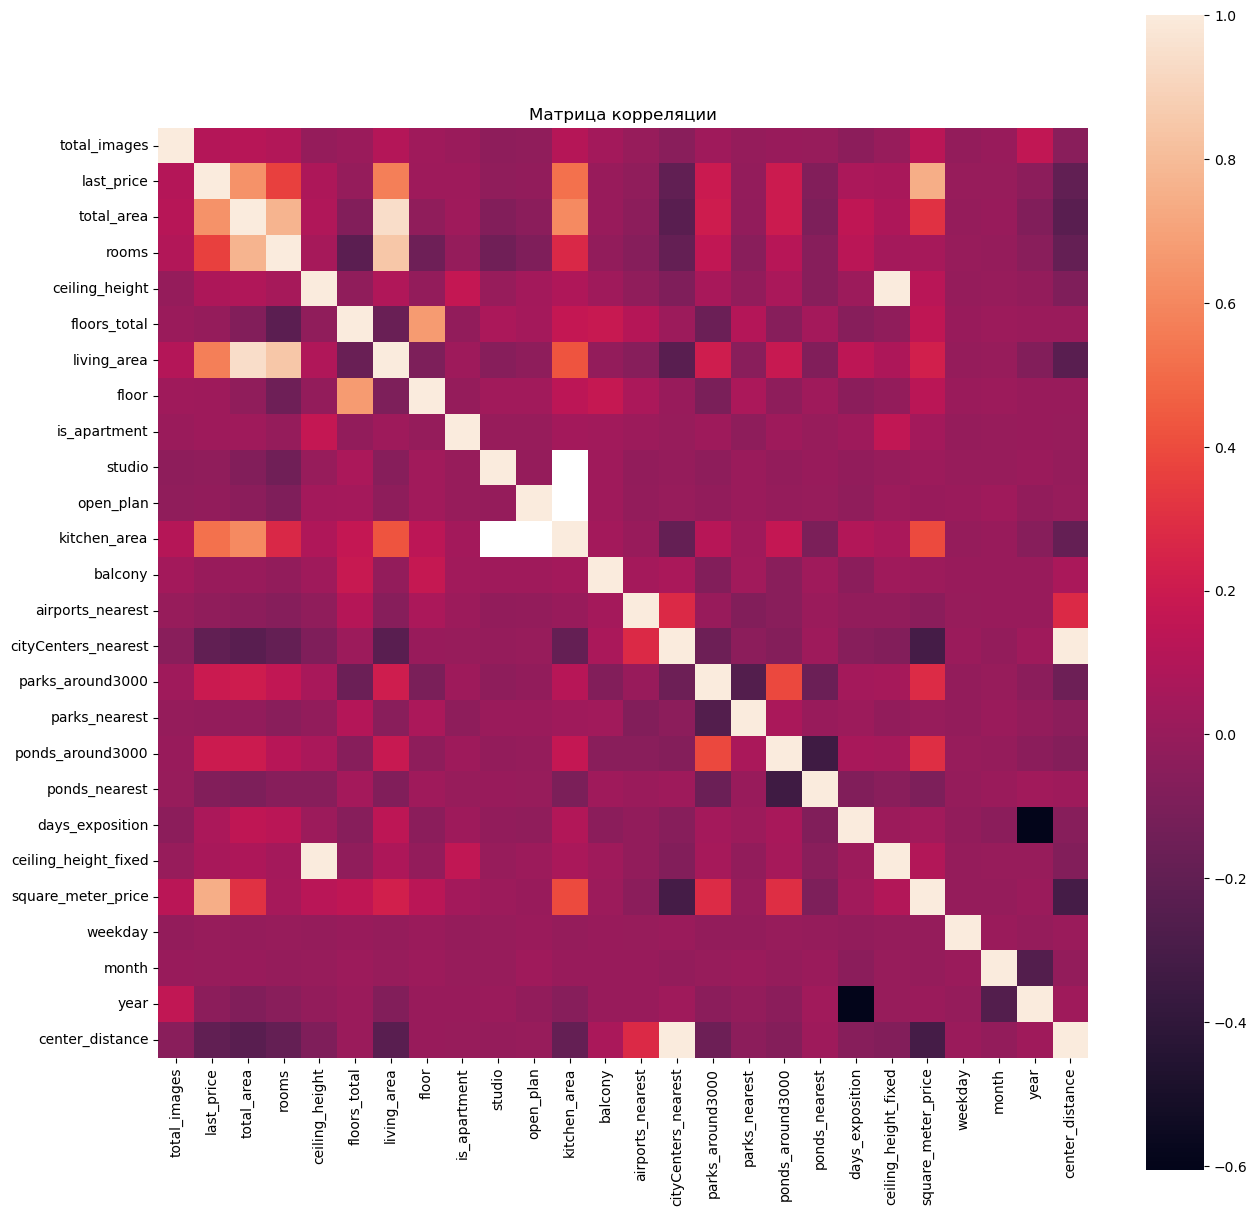

In [33]:
plt.figure(figsize=(15, 15))
plt.title('Матрица корреляции')
seaborn.heatmap(data.corr(), square=True)
plt.show()

Зависимость есть и здесь, но менее линейная, хотя при этом и меньше резких выбросов.

<AxesSubplot:title={'center':'Взаимосвязь цены и количества комнат'}, xlabel='rooms'>

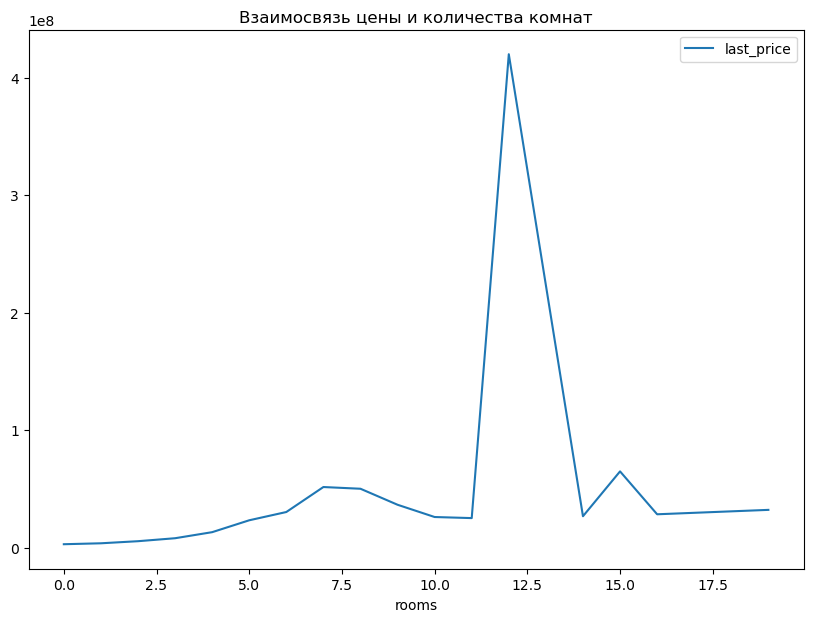

In [34]:
price_rooms = data.pivot_table(index='rooms', values='last_price') # цена и количество комнат
price_rooms = price_rooms.reset_index()
price_rooms.plot(x='rooms', y='last_price', figsize=(10,7), title='Взаимосвязь цены и количества комнат')

In [35]:
print(price_rooms.loc[((price_rooms['rooms'] > 11) & (price_rooms['rooms' ] < 13))])

    rooms   last_price
12     12  420000000.0


Наблюдается одиночный резкий выброс цены на значении комнат 12. Такая квартира всего одна, как показывает фильтр, её можно считать выбросом.

In [36]:
price_floor_type = data.pivot_table(index='floor_type', values='last_price') # цена и тип этажа
price_floor_type = price_floor_type.reset_index()
# price_floor_type.plot(x='floor_type', y='last_price') # график не даёт полную картину, всего 3 точки
price_floor_type = price_floor_type.groupby('floor_type')
print(price_floor_type.median()) # сгруппировали по типу этажа и посчитали медиану

              last_price
floor_type              
другой      6.626015e+06
первый      4.811738e+06
последний   7.297320e+06


Самые дешёвые квартиры - на первом этаже, а вот на последнем оказались самыми дорогими.

In [37]:
price_weekday = data.pivot_table(index='weekday', values='last_price', aggfunc='median') # цена и день недели
#price_weekday = price_weekday.reset_index() # это было на всякий случай
price_month = data.pivot_table(index='month', values='last_price', aggfunc='median') # цена и месяц публикации
#price_month = price_month.reset_index()
price_year = data.pivot_table(index='year', values='last_price', aggfunc='median') # цена и год публикации
# price_year = price_year.reset_index()

print(price_weekday)
print(price_month)
print(price_year)

         last_price
weekday            
0         4685000.0
1         4700000.0
2         4700000.0
3         4675000.0
4         4585000.0
5         4600000.0
6         4550000.0
       last_price
month            
1       4655200.0
2       4700000.0
3       4691000.0
4       4800000.0
5       4500000.0
6       4450000.0
7       4600000.0
8       4550000.0
9       4700000.0
10      4550000.0
11      4690000.0
12      4800000.0
      last_price
year            
2014   7540000.0
2015   5300000.0
2016   4500000.0
2017   4500000.0
2018   4600000.0
2019   5050000.0


Считаем медианы цен по дням недели, месяцам и годам. Из этого заметно, что день недели и месяц слабо влияют на цену (разница между самой высокой и самой низкой ценой в первом случае ~3%, во втором ~6%), хотя зависимость и есть: самая низкая цена наблюдается в воскресенье и май, самая высокая - во вторник/среду и апрель/декабрь. По годам же более выражено: самые дорогие квартиры были в 2014, самые дешёвые - в 2016-2017.

In [38]:
# считаем среднюю цену квадратного метра в населённых пунктах с наибольшим числом объявлений

data_locality = data.pivot_table(index='locality_name', values='last_price', aggfunc='count').reset_index()
data_locality.columns = ['locality_name', 'count'] # количество объявлений по населённым пунктам
top10 = data_locality.sort_values(by='count', ascending=False).head(10)
# print(top10) # вывод для проверки
mean_meter_price = data.pivot_table(index='locality_name', values='square_meter_price', aggfunc='mean').reset_index()
# средняя цена квадратного метра по всем населённым пунктам
top10_meter_price = top10.merge(mean_meter_price, on='locality_name') # средняя цена по топ-10
# print(top10_meter_price)
print(
    'Максимальная цена квадратного метра:\n',
    top10_meter_price[top10_meter_price['square_meter_price'] == top10_meter_price['square_meter_price'].max()]
)
print(
    'Минимальная цена квадратного метра:\n',
    top10_meter_price[top10_meter_price['square_meter_price'] == top10_meter_price['square_meter_price'].min()]
)

Максимальная цена квадратного метра:
      locality_name  count  square_meter_price
0  Санкт-Петербург  14578       114179.304816
Минимальная цена квадратного метра:
   locality_name  count  square_meter_price
7       Гатчина    292        68627.363919


Самая высокая цена квадратного метра наблюдается в Санкт-Петербурге, самая низкая - в Гатчине.

<AxesSubplot:xlabel='center_distance'>

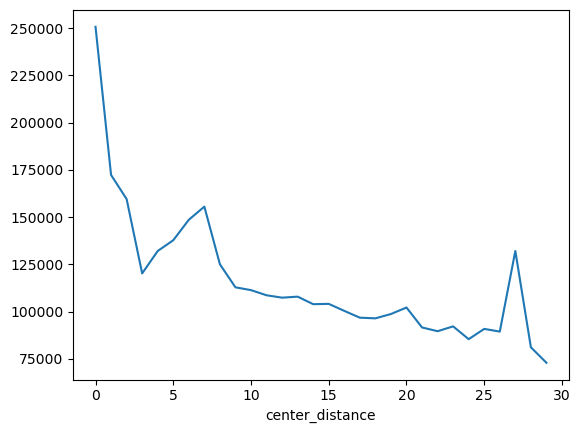

In [39]:
# средняя цена километра от центра города в Петербурге

spb_group_kilometer = data.query('locality_name == "Санкт-Петербург"').groupby('center_distance')
spb_kilometer_price = spb_group_kilometer['square_meter_price'].mean()
spb_kilometer_price.plot(x='center_distance', y='square_meter_price')

Средняя цена квадратного метра в Санкт-Петербурге уменьшается с ростом расстояния от центра города, но с двумя пиками на ~7 и ~27 километрах.

### Общий вывод

Обработаны данные:
1. Устранены пропуски (там, где это возможно сделать без ущерба данным) и неявные дубликаты в названиях населённых пунктов.
2. Найдены и устранены аномалии в столбцах, отображающих высоту потолков и жилую площадь.
3. Выданы категории этажам.
4. Посчитано расстояние до центра в километрах.
5. Категоризирована дата публикации объявления по дням недели, месяцам и годам.

Проанализированы цены на недвижимость в различных населённых пунктах.
1. Гипотеза о зависимости цены от площади: подтверждена.
2. Гипотеза о зависимости цены от количества комнат: частично подтверждена (зависимость несильная, плюс картину искажает выброс).
3. Гипотеза о зависимости цены от даты публикации объявления: подтверждена.

Найдены особенности:
1. Зависимость цены от категории этажа: показано, что самая низкая цена у квартир на первом этаже, самая высокая - на последнем.
2. Средняя цена квадратного метра в Санкт-Петербурге уменьшается с ростом расстояния от центра города, но с двумя пиками, где она резко растёт.
3. Большинство продаж занимает менее 600 дней, при этом быстрыми можно считать продажи, занявшие меньше 100 дней (медиана - 101 день).

**Чек-лист готовности проекта**

Поставьте 'x' в выполненных пунктах. Далее нажмите Shift+Enter.

- [x]  открыт файл
- [x]  файлы изучены (выведены первые строки, метод `info()`, гистограммы и т.д.)
- [x]  определены пропущенные значения
- [x]  заполнены пропущенные значения там, где это возможно
- [x]  есть пояснение, какие пропущенные значения обнаружены
- [x]  изменены типы данных
- [x]  есть пояснение, в каких столбцах изменены типы и почему
- [x]  устранены неявные дубликаты в названиях населённых пунктов
- [x]  устранены редкие и выбивающиеся значения (аномалии) во всех столбцах
- [x]  посчитано и добавлено в таблицу: цена одного квадратного метра
- [x]  посчитано и добавлено в таблицу: день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- [x]  посчитано и добавлено в таблицу: месяц публикации объявления
- [x]  посчитано и добавлено в таблицу: год публикации объявления
- [x]  посчитано и добавлено в таблицу: тип этажа квартиры (значения — «первый», «последний», «другой»)
- [x]  посчитано и добавлено в таблицу: расстояние в км до центра города
- [x]  изучены и описаны следующие параметры:
        - общая площадь;
        - жилая площадь;
        - площадь кухни;
        - цена объекта;
        - количество комнат;
        - высота потолков;
        - этаж квартиры;
        - тип этажа квартиры («первый», «последний», «другой»);
        - общее количество этажей в доме;
        - расстояние до центра города в метрах;
        - расстояние до ближайшего аэропорта;
        - расстояние до ближайшего парка;
        - день и месяц публикации объявления
- [x]  построены гистограммы для каждого параметра
- [x]  выполнено задание: "Изучите, как быстро продавались квартиры (столбец days_exposition). Этот параметр показывает, сколько дней «висело» каждое объявление.
    - Постройте гистограмму.
    - Посчитайте среднее и медиану.
    - В ячейке типа markdown опишите, сколько обычно занимает продажа. Какие продажи можно считать быстрыми, а какие — необычно долгими?"
- [x]  выполнено задание: "Какие факторы больше всего влияют на общую (полную) стоимость объекта? Постройте графики, которые покажут зависимость цены от указанных ниже параметров. Для подготовки данных перед визуализацией вы можете использовать сводные таблицы."
        - общей площади;
        - жилой площади;
        - площади кухни;
        - количество комнат;
        - типа этажа, на котором расположена квартира (первый, последний, другой);
        - даты размещения (день недели, месяц, год);
- [x]  выполнено задание: "Посчитайте среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений. Выделите населённые пункты с самой высокой и низкой стоимостью квадратного метра. Эти данные можно найти по имени в столбце `locality_name`."
- [x]  выполнено задание: "Ранее вы посчитали расстояние до центра в километрах. Теперь выделите квартиры в Санкт-Петербурге с помощью столбца `locality_name` и вычислите среднюю цену каждого километра. Опишите, как стоимость объектов зависит от расстояния до центра города."
- [x]  в каждом этапе есть промежуточные выводы
- [x]  есть общий вывод